## How often do we get no-hitters?

The number of games played between each no-hitter in the modern era (1901-2015) of Major League Baseball is stored in the array `nohitter_times`.

If we assume that no-hitters are described as a Poisson process, then the time between no-hitters is Exponentially distributed. The Exponential distribution has a single parameter, which we will call $\tau$, the typical interval time. The value of the parameter $\tau$ that makes the exponential distribution best match the data is the mean interval time (where time is in units of number of games) between no-hitters.

Here, we'll compute the value of this parameter from the data. Then, use `np.random.exponential()` to "repeat" the history of Major League Baseball by drawing inter-no-hitter times from an exponential distribution with the $\tau$ we found and plot the histogram as an approximation to the PDF.

We'll use the standard aliases of NumPy, pandas, matplotlib.pyplot, and seaborn as `np`, `pd`, `plt`, and `sns`, respectively.

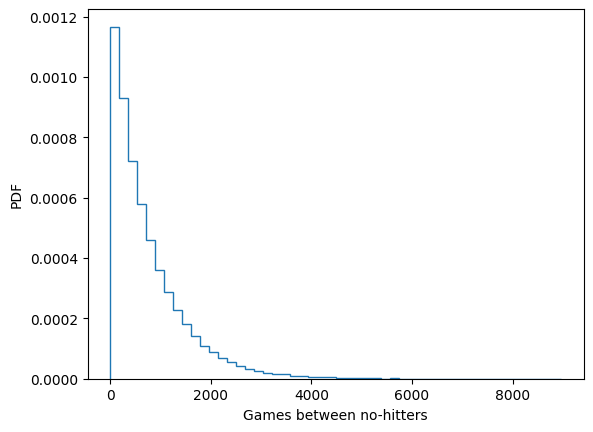

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)
nohitter_times = np.loadtxt('./data/days_between_nohitters.txt', dtype=int)

# mean no-hitter time: tau
tau = np.mean(nohitter_times)
# Draw out of an exponential distribution with parameter tau: inter_nohitter_time
inter_nohitter_time = np.random.exponential(tau, 100000)

# Plot the PDF and label axes
_ = plt.hist(inter_nohitter_time, density=True,
             bins=50, histtype='step')
_ = plt.xlabel('Games between no-hitters')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

## Do the data follow our story?

We have modeled no-hitters using an Exponential distribution. Now we'll create an empirical cummulative distribution function (ECDF) of the real data and then overlay the theoretical CDF with the ECDF from the data. This will help us verify that the Exponential distribution describes the observed data.

In [2]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

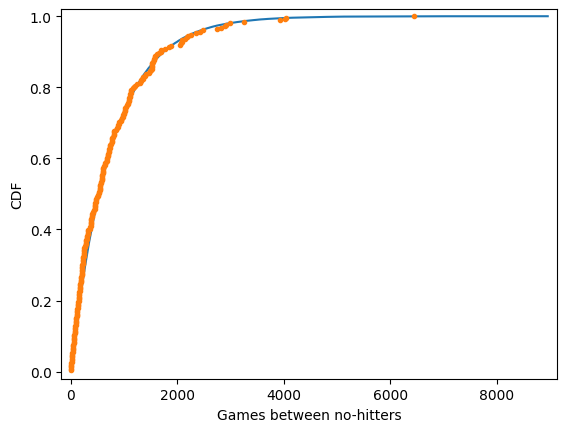

In [3]:
# Create an ECDF from real data: x, y
x, y = ecdf(nohitter_times)

# Create a CDF from theoretical samples: x_theor, y_theor
x_theor, y_theor = ecdf(inter_nohitter_time)

# Overlay the plots
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')

# Margins and axis labels
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Show the plot
plt.show()

It looks like no-hitters in the modern era of Major League Baseball does indeed follow and exponential distribution. Based on the story of the Exponential distribution, this suggests that they are a random process; when a no-hitter will happen is independent of when the last no-hitter was.

## How is this parameter optimal?

Now we'll sample out of an exponential distribution with $\tau$ being **twice** as large as the optimal. We'll do this again for a $\tau$ that is **half** as large. We'll then make CDFs of these samples and overlay them with the data. We'll see that they do not reproduce the data as well. This will show us that the $\tau$ we computed from the mean inter-no-hitter times is optimal in that it best reproduces the data.


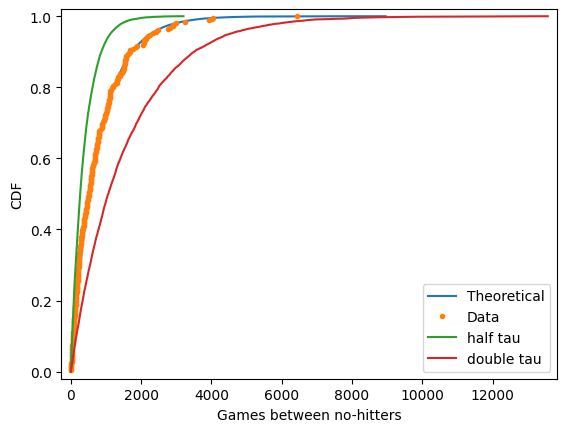

In [4]:
# Plot the theoretical CDFs
plt.plot(x_theor, y_theor, label="Theoretical")
plt.plot(x, y, marker='.', linestyle='none', label="Data")
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Take samples with half tau: samples_half
samples_half = np.random.exponential(tau / 2, 10000)

# Take samples with double tau: samples_double
samples_double = np.random.exponential(tau * 2, 10000)

# Generate CDFs from these samples
x_half, y_half = ecdf(samples_half)
x_double, y_double = ecdf(samples_double)

# Plot these CDFs as lines
_ = plt.plot(x_half, y_half, label="half tau")
_ = plt.plot(x_double, y_double, label="double tau")
_ = plt.legend()

# Show the plot
plt.show()

## EDA of literacy and fertility data

In this section, we'll look at the correlation between female literacy and fertility (defined as the average number of children born per woman) throughout the world. For ease of analysis and interpretation, we will work with the illiteracy rate.

Since it's always a good idea to do some EDA ahead of analysis, we'll start by plotting the **fertility** versus **illiteracy** and compute the Pearson correlation coefficient. The NumPy array illiteracy has the illiteracy rate among females for most of the world's nations. The array fertility has the corresponding fertility data.

In [5]:
df = pd.read_csv('./data/female_literacy_fertility.csv')
fertility = df["fertility"].to_numpy()
illiteracy = 100 - df["female literacy"].to_numpy()  # literacy is expressed as a percent
print(fertility[:3])
print(illiteracy[:3])

[1.769 2.682 2.077]
[ 9.5 49.2  1. ]


In [6]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

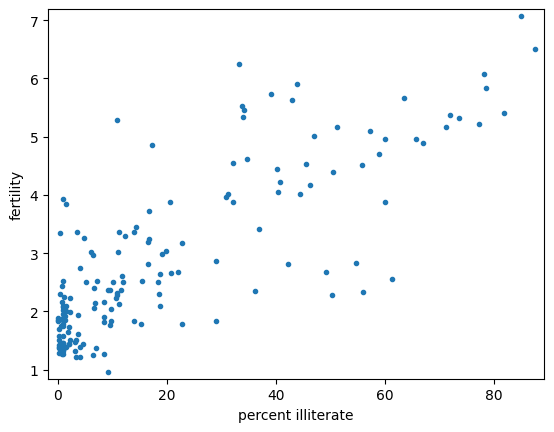

0.8041324026815347


In [7]:
# Plot the illiteracy rate versus fertility
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')

# Set the margins and label axes
plt.margins(0.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')

# Show the plot
plt.show()

# Show the Pearson correlation coefficient
print(pearson_r(illiteracy, fertility))

slope = 0.049798548090634255 children per woman / percent illiterate
intercept = 1.8880506106365562 children per woman


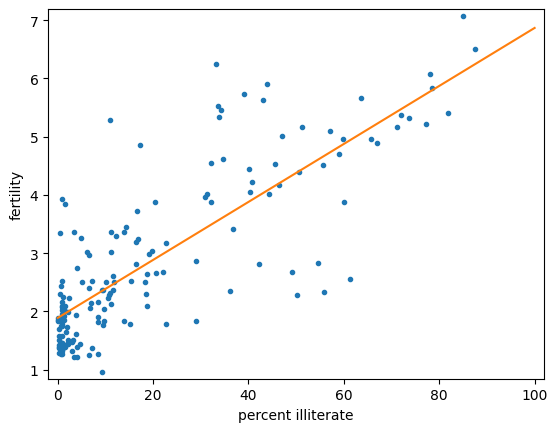

In [8]:
# Plot the illiteracy rate versus fertility
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')

# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(illiteracy, fertility, 1)

# Print the results to the screen
print('slope =', a, 'children per woman / percent illiterate')
print('intercept =', b, 'children per woman')

# Make theoretical line to plot
x = np.array([0, 100])
y = a * x + b

# Add regression line to your plot
_ = plt.plot(x, y)

# Draw the plot
plt.show()

## How is it optimal?

The function `np.polyfit()` finds the optimal slope and intercept by minimizing the sum of the squares of the residuals, also known as RSS (for residual sum of squares). Here, we'll plot the function that is being optimized, the **RSS**, versus the slope parameter `a`. To do this, we'll fix the intercept to be what was found in the optimization. Where is it minimal?

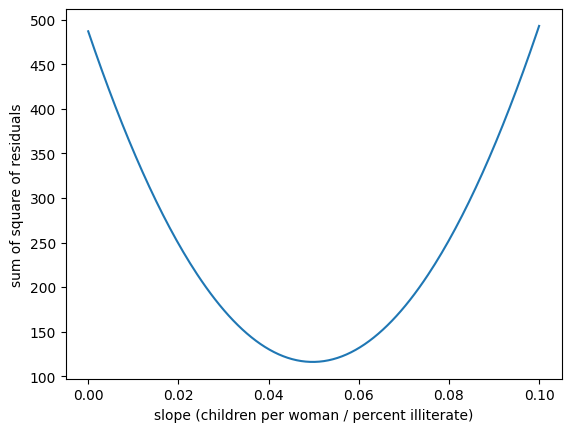

In [9]:
# Specify slopes to consider: a_vals
a_vals = np.linspace(0, 0.1, 200)

# Initialize sum of square of residuals: rss
rss = np.empty_like(a_vals)

# Compute sum of square of residuals for each value of a_vals
for i, a in enumerate(a_vals):
    rss[i] = np.sum((fertility - a*illiteracy - b)**2)

# Plot the RSS
plt.plot(a_vals, rss, '-')
plt.xlabel('slope (children per woman / percent illiterate)')
plt.ylabel('sum of square of residuals')

plt.show()

## Linear regression on appropriate Anscombe data

The four sets of daa shown in the image below have the following four properties in common:

- They all the have the same mean of the x-values.
- They all the have the same mean of the y-values.
- They have the same 

<img src="anscombes_quartet.png"><\img>

We'll perform a linear regression on the data set from Anscombe's quartet that is most reasonably interpreted with linear regression.

In [10]:
df_ansc = pd.read_csv('./data/anscombe.csv', header=1)
df_ansc.columns = ["x1", "y1", "x2", "y2", "x3", "y3", "x4", "y4"]
df_ansc

,x1,y1,x2,y2,x3,y3,x4,y4
0,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
1,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
2,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
3,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
4,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47
5,14.0,9.96,14.0,8.10,14.0,8.84,8.0,7.04
6,6.0,7.24,6.0,6.13,6.0,6.08,8.0,5.25
7,4.0,4.26,4.0,3.10,4.0,5.39,19.0,12.50
8,12.0,10.84,12.0,9.13,12.0,8.15,8.0,5.56
9,7.0,4.82,7.0,7.26,7.0,6.42,8.0,7.91


In [11]:
x1 = df_ansc["x1"].to_numpy()
y1 = df_ansc["y1"].to_numpy()

0.5000909090909094 3.000090909090908


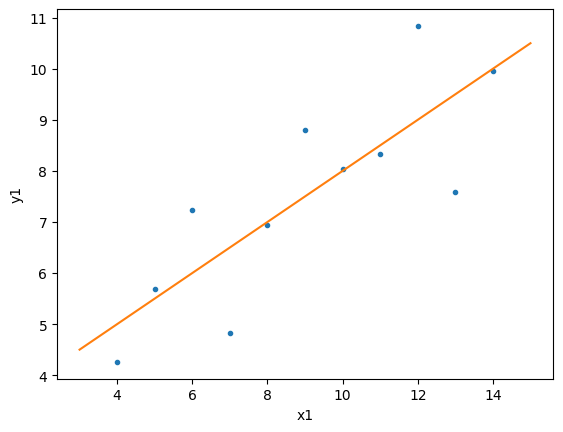

In [12]:
# Perform linear regression: a, b
a, b = np.polyfit(x1, y1, 1)

# Print the slope and intercept
print(a, b)

# Generate theoretical x and y data: x_theor, y_theor
x_theor = np.array([3, 15])
y_theor = a * x_theor + b

# Plot the Anscombe data and theoretical line
_ = plt.plot(x1, y1, marker='.', linestyle='none')
_ = plt.plot(x_theor, y_theor)

# Label the axes
plt.xlabel('x1')
plt.ylabel('y1')

# Show the plot
plt.show()

## Linear regression on all Anscombe data

To verify that all four of the Anscombe data sets have the same slope and intercept from a linear regression, we can compute the slope and intercept for each set. The data will be organized into lists: `anscombe_x = [x1, x2, x3, x4]` and `anscombe_y = [y1, y2, y3, y4]`, where, for example, x2 and y2 are the
and values for the second Anscombe data set.

In [13]:
anscombe_x = [x1, df_ansc["x2"].to_numpy(), df_ansc["x3"].to_numpy(), df_ansc["x4"].to_numpy()]
anscombe_y = [y1, df_ansc["y2"].to_numpy(), df_ansc["y3"].to_numpy(), df_ansc["y4"].to_numpy()]

In [14]:
# Iterate through x,y pairs
for x, y in zip(anscombe_x, anscombe_y):
    # Compute the slope and intercept: a, b
    a, b = np.polyfit(x, y, 1)

    # Print the result
    print(f"slope: {a:.3f}, intercept: {b:.3f}")


slope: 0.500, intercept: 3.000
slope: 0.500, intercept: 3.001
slope: 0.500, intercept: 3.002
slope: 0.500, intercept: 3.002


## Generating bootstrap replicates

### Bootstrapping by hand

To help an gain intuition about how bootstrapping works, imagine we have a data set that has only three points, \[-1, 0, 1\].

- How many unique bootstrap samples can be drawn (e.g., \[-1, 0, 1\] and \[1, 0, -1\] are unique)?
  - $3^3 = 27$
- What is the maximum mean you can get from a bootstrap sample?
  - $(1 + 1 + 1) / 3 = 1$

**NOTE: These are too few data to get meaningful results from bootstrap procedures, but this example is useful for intuition.**

### Visualizing bootstrap samples

Next, we'll generate bootstrap samples from the set of annual rainfall data measured at the Sheffield Weather Station in the UK from 1883 to 2015. The data will be read in and stored in the NumPy array `rainfall` in units of millimeters (mm). By graphically displaying the bootstrap samples with an ECDF, we can get a feel for how bootstrap sampling allows probabilistic descriptions of data.

In [15]:
df_rainfall = pd.read_fwf('./data/weather_edited.csv')
df_rainfall.head()

,yyyy,mm,tmax,tmin,af,rain,sun
0,1883,1,6.3,1.7,6,122.1,---
1,1883,2,8.0,2.8,2,69.8,---
2,1883,3,4.8,-1.6,23,29.6,---
3,1883,4,12.2,3.8,2,74.0,---
4,1883,5,14.7,6.2,0,31.2,---


In [16]:
rainfall = df_rainfall.groupby('yyyy')['rain'].sum().to_numpy()  # aggregate to get annual rainfall
rainfall[:5]

array([875.5, 648.2, 788.1, 940.3, 491.1])

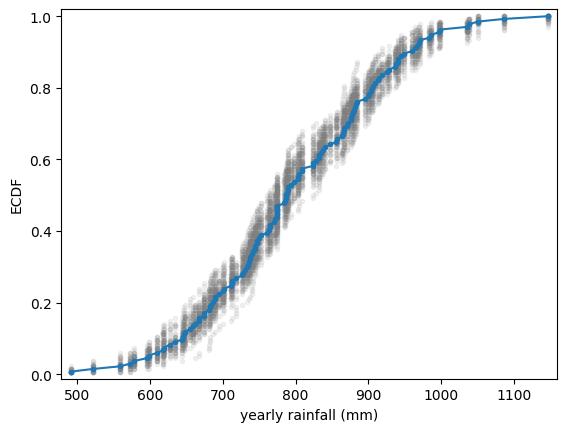

In [17]:
for _ in range(50):
    # Generate bootstrap sample: bs_sample
    bs_sample = np.random.choice(rainfall, size=len(rainfall))

    # Compute and plot ECDF from bootstrap sample
    x, y = ecdf(bs_sample)
    _ = plt.plot(x, y, marker='.', linestyle='none',
                 c='gray', alpha=0.1)

# Compute and plot ECDF from original data
x, y = ecdf(rainfall)
_ = plt.plot(x, y, marker='.')

# Make margins and label axes
plt.margins(0.02)
_ = plt.xlabel('yearly rainfall (mm)')
_ = plt.ylabel('ECDF')

# Show the plot
plt.show()

## Bootstrap confidence intervals

First, some terminology:

- **bootstrapping**: the use of resampled data to perform statistical inference
- **boostrap sample**: a resampled array of the data
- **boostrap replicate**: a statistic calculated  from a resampled array (e.g. the mean)
- **confidence interval of a statistic**: if we repeat measurements over and over again, `p%` of the observed values would lie within the `p%` confidence interval(CI)

We can build confidence intervals through the use of bootstrap samples.

In [18]:
def bootstrap_replicate_1d(data, func):
    """ Generates a boostrap replicate of 1 dimensional data
    """
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

In [19]:
df_light = pd.read_csv('./data/michelson_speed_of_light.csv', index_col=0)
print(df_light.columns)
df_light.head()

Index(['date', 'distinctness of image', 'temperature (F)',
       'position of deflected image', 'position of slit',
       'displacement of image in divisions',
       'difference between greatest and least', 'B', 'Cor',
       'revolutions per second', 'radius (ft)', 'value of one turn of screw',
       'velocity of light in air (km/s)', 'remarks'],
      dtype='object')


,date,distinctness of image,temperature (F),position of deflected image,position of slit,displacement of image in divisions,difference between greatest and least,B,Cor,revolutions per second,radius (ft),value of one turn of screw,velocity of light in air (km/s),remarks
0,June 5,3,76,114.85,0.300,114.55,0.17,1.423,-0.132,257.36,28.672,0.99614,299850,Electric light.
1,June 7,2,72,114.64,0.074,114.56,0.10,1.533,-0.084,257.52,28.655,0.99614,299740,P.M. Frame inclined at various angles
2,June 7,2,72,114.58,0.074,114.50,0.08,1.533,-0.084,257.52,28.647,0.99614,299900,P.M. Frame inclined at various angles
3,June 7,2,72,85.91,0.074,85.84,0.12,1.533,-0.084,193.14,28.647,0.99598,300070,P.M. Frame inclined at various angles
4,June 7,2,72,85.97,0.074,85.89,O.07,1.533,-0.084,193.14,28.650,0.99598,299930,P.M. Frame inclined at various angles


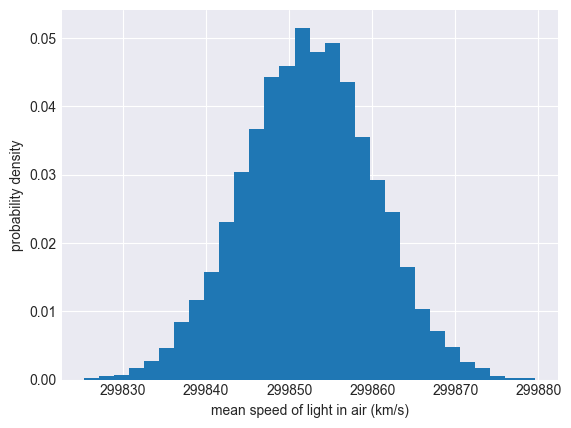

In [20]:
# create 10000 boostrap replicates of the Michelson speed of light data
michelson_speed_of_light = df_light['velocity of light in air (km/s)'].to_numpy()
bs_replicates = np.empty(10000)
for i in range(10000):
    bs_replicates[i] = bootstrap_replicate_1d(
        michelson_speed_of_light, np.mean)

plt.style.use('seaborn-v0_8-darkgrid')
plt.ticklabel_format(useOffset=False)  # don't want scientific notation on either axes

# create histogram that approximates a PDF
_ = plt.hist(bs_replicates, bins=30, density=True)  # normed keyword is deprecated
_ = plt.xlabel('mean speed of light in air (km/s)')
_ = plt.ylabel('probability density')
plt.show()

In [21]:
# compute the 95% CI from this bootstrap dist of means
speed, cum_prob = ecdf(bs_replicates)
low_95 = np.max(speed[cum_prob < 0.025])
high_95 = np.min(speed[cum_prob > 0.975])
print(f"The 95% CI for the speed of light computed MANUALLY is between {low_95} and {high_95}")

The 95% CI for the speed of light computed MANUALLY is between 299836.8 and 299867.7


In [22]:
# do the same the easier way :-)
conf_int = np.percentile(bs_replicates, [2.5, 97.5])
print(f"The 95% CI for the speed of light computed MANUALLY is between {conf_int[0]} and {conf_int[1]}") # exactly the same

The 95% CI for the speed of light computed MANUALLY is between 299836.9 and 299867.7


## Generating many bootstrap replicates

We can use the function `bootstrap_replicate_1d()` to write another function, `draw_bs_reps(data, func, size=1)`, which generates many bootstrap replicates from the data set. This function will come in handy as we compute confidence intervals and later when we do hypothesis tests.

In [23]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

## Bootstrap replicates of the mean and the SEM

Now we'll compute a bootstrap estimate of the probability density function of the mean annual rainfall at the Sheffield Weather Station. Remember, we are estimating the mean annual rainfall we would get if the Sheffield Weather Station could repeat all of the measurements from 1883 to 2015 over and over again. This is a probabilistic estimate of the mean. We will plot the PDF as a histogram, and confirm our intuition that it is Normal.

In fact, it can be shown theoretically that under not-too-restrictive conditions, the value of the mean will always be Normally distributed (thank you Central Limit Theorem). (This does not hold in general, just for the mean and a few other statistics.) The standard deviation of this distribution, called the standard error of the mean, or SEM, is given by the standard deviation of the data divided by the square root of the number of data points. I.e., for a data set, `sem = np.std(data) / np.sqrt(len(data))`. Using hacker statistics, we get this same result without the need to derive it, but we will verify this result from your bootstrap replicates.

10.635458130769608
10.586345761814925


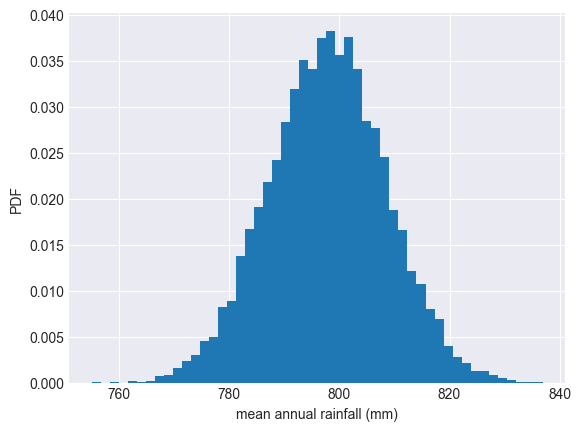

In [24]:
# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicates = draw_bs_reps(rainfall, np.mean, 10000)

# Compute and print SEM
sem = np.std(rainfall) / np.sqrt(len(rainfall))
print(sem)

# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print(bs_std)

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, density=True)
_ = plt.xlabel('mean annual rainfall (mm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

In [25]:
# 95% CI
np.percentile(bs_replicates, [2.5, 97.5])

array([776.84630597, 818.42878731])

## Bootstrap replicates of other statistics

We saw earlier that the mean is Normally distributed. This does not necessarily hold for other statistics, but we can always take bootstrap replicates! In the next section, we'll generate bootstrap replicates for the variance of the annual rainfall at the Sheffield Weather Station and plot the histogram of the replicates by making use of the `draw_bs_reps()` function we defined earlier.

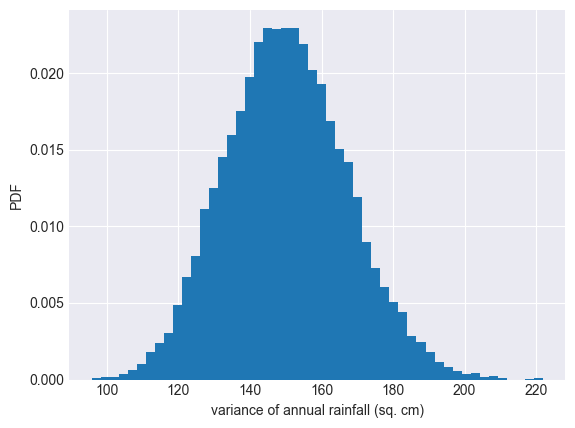

In [26]:
# Generate 10,000 bootstrap replicates of the variance: bs_replicates
bs_replicates = draw_bs_reps(rainfall, np.var, 10000)

# Put the variance in units of square centimeters
bs_replicates = bs_replicates / 100

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, density=True)
_ = plt.xlabel('variance of annual rainfall (sq. cm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

## Confidence interval on the rate of no-hitters

Consider again the inter-no-hitter intervals for the modern era of baseball. Here we'll generate 10,000 bootstrap replicates of the optimal parameter. Plot a histogram of your replicates and report a 95% confidence interval.

95% confidence interval = [663.07061753 868.77041833] games


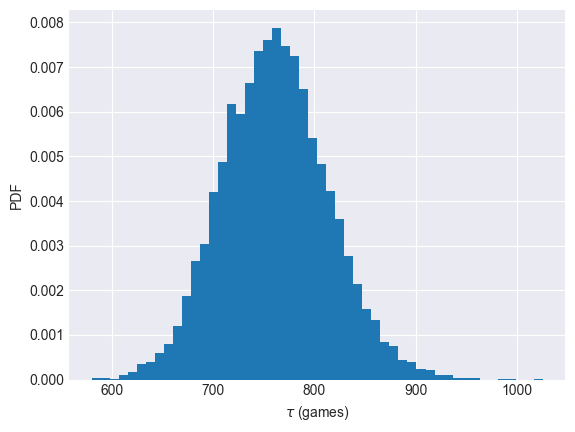

In [27]:
# Draw bootstrap replicates of the mean no-hitter time (equal to tau): bs_replicates
bs_replicates = draw_bs_reps(nohitter_times, np.mean, 10000)

# Compute the 95% confidence interval: conf_int
conf_int = np.percentile(bs_replicates, [2.5, 97.5])

# Print the confidence interval
print('95% confidence interval =', conf_int, 'games')

# Plot the histogram of the replicates
_ = plt.hist(bs_replicates, bins=50, density=True)
_ = plt.xlabel(r'$\tau$ (games)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

## A function to do pairs bootstrap

Doing a pairs bootstrap involves resampling pairs of data. Each collection of pairs can be fit with a line, in this case using `np.polyfit()`. We can do this again and again, generating bootstrap replicates of the parameter values. To have a useful tool for doing pairs bootstrap, we will write a function to perform pairs bootstrap on a set of x,y data.

In [28]:
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

    return bs_slope_reps, bs_intercept_reps

[0.04389658 0.05521369]


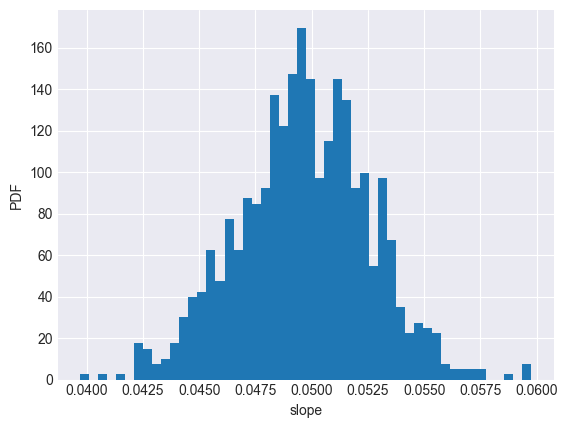

In [29]:
# Generate replicates of slope and intercept using pairs bootstrap
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(illiteracy, fertility, 1000)

# Compute and print 95% CI for slope
print(np.percentile(bs_slope_reps, [2.5, 97.5]))  # remember, bounds are percent

# Plot the histogram
_ = plt.hist(bs_slope_reps, bins=50, density=True)
_ = plt.xlabel('slope')
_ = plt.ylabel('PDF')
plt.show()

## Plotting bootstrap regressions

A nice way to visualize the variability we might expect in a linear regression is to plot the lines we would get from each bootstrap replicate of the slope and intercept. We'll do this for the first 100 of your bootstrap replicates of the slope and intercept.

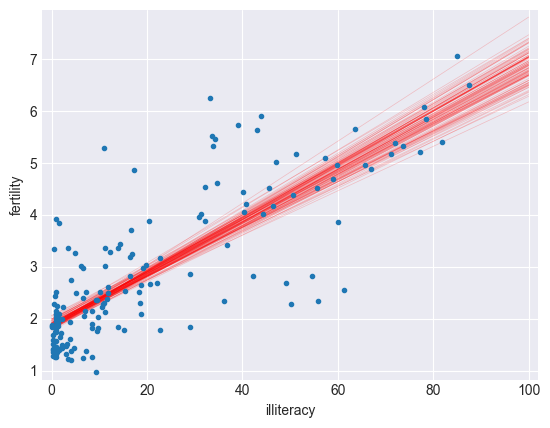

In [30]:
# Generate array of x-values for bootstrap lines: x
x = np.array([0, 100])

# Plot the bootstrap lines
for i in range(0, 100):
    _ = plt.plot(x, 
                 bs_slope_reps[i]*x + bs_intercept_reps[i],
                 linewidth=0.5, alpha=0.2, color='red')

# Plot the data
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')

# Label axes, set the margins, and show the plot
_ = plt.xlabel('illiteracy')
_ = plt.ylabel('fertility')
plt.margins(0.02)
plt.show()

## Generating a permutation sample

Permutation sampling is a great way to simulate the hypothesis that two variables have identical probability distributions. This is often a hypothesis we want to test, so here we will write a function to generate a permutation sample from two data sets.

### The process

A permutation sample of two arrays having respectively `n1` and `n2` entries is constructed by concatenating the arrays together, scrambling the contents of the concatenated array, and then taking the first `n1` entries as the permutation sample of the first array and the last `n2` entries as the permutation sample of the second array.

In [31]:
def permutation_sample(data1, data2):
    """Generate a (paired) permutation sample from two data sets.
    
    Args:
      data1 (numpy array): first data set
      data2 (numpy array): second data set

    Returns:
      numpy array that is the concatenation of data1 and data2, permuted and then
      split out into the sizes of the orginal arrays passed in
    """

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

## Visualizing permutation sampling

To help see how permutation sampling works, we'll generate permutation samples and look at them graphically.

We'll use the Sheffield Weather Station data again, this time considering the monthly rainfall in June (a dry month) and November (a wet month). We expect these might be differently distributed, so we will take permutation samples to see how their ECDFs would look **if they were identically distributed**.

We'll wrangle these samples from the `df_rainfall` dataframe we read in earlier into NumPy arrays we'll call `rain_june` and `rain_november`.

In [32]:
df_rainfall.head()

,yyyy,mm,tmax,tmin,af,rain,sun
0,1883,1,6.3,1.7,6,122.1,---
1,1883,2,8.0,2.8,2,69.8,---
2,1883,3,4.8,-1.6,23,29.6,---
3,1883,4,12.2,3.8,2,74.0,---
4,1883,5,14.7,6.2,0,31.2,---


In [33]:
rain_june = df_rainfall.loc[df_rainfall['mm'] == 6, ['rain']].to_numpy().flatten()[:-1]  # last entry looks like an outlier
rain_november = df_rainfall.loc[df_rainfall['mm'] == 11, ['rain']].to_numpy().flatten()

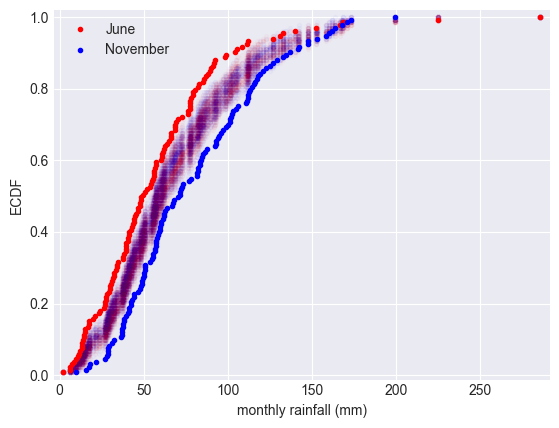

In [34]:
for _ in range(50):
    # Generate permutation samples
    perm_sample_1, perm_sample_2 = permutation_sample(rain_june, rain_november)

    # Compute ECDFs
    x_1, y_1 = ecdf(perm_sample_1)
    x_2, y_2 = ecdf(perm_sample_2)

    # Plot ECDFs of permutation sample
    _ = plt.plot(x_1, y_1, marker='.', linestyle='none',
                 color='red', alpha=0.02)
    _ = plt.plot(x_2, y_2, marker='.', linestyle='none',
                 color='blue', alpha=0.02)

# Create and plot ECDFs from original data, no alpha to make points stand out
x_1, y_1 = ecdf(rain_june)
x_2, y_2 = ecdf(rain_november)
_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red', label='June')
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue', label='November')

# Label axes, set margin, and show plot
plt.margins(0.02)
_ = plt.xlabel('monthly rainfall (mm)')
_ = plt.ylabel('ECDF')
_ = plt.legend()
plt.show()

## Generating permutation replicates

A permutation replicate is a **single value** of a statistic (e.g. mean, median, etc.) computed from a **permutation sample**. The `draw_bs_reps()` function above is useful for generating bootstrap replicates. It is useful to have a similar function, `draw_perm_reps()`, to generate permutation replicates which is shown below.

The function has call signature `draw_perm_reps(data_1, data_2, func, size=1)`. Importantly, `func` must be a function that takes two arrays as arguments. In most circumstances, `func` will be a function you write yourself.

In [35]:
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generates multiple permutation replicates.
    
    Args:
      data_1: numpy.array, first data set
      data_2: numpy array, second data set

    Returns:
      np.array of replicates (test statistics) computed from data_1 and data_2
    
    """

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

## Look before you leap: EDA before hypothesis testing

Kleinteich and Gorb (Sci. Rep., 4, 5225, 2014) performed an interesting experiment with South American horned frogs. They held a plate connected to a force transducer, along with a bait fly, in front of them. They then measured the impact force and adhesive force of the frog's tongue when it struck the target.

Frog A is an adult and Frog B is a juvenile. The researchers measured the impact force of 20 strikes for each frog. In this section, we will test the hypothesis that the two frogs have the same distribution of impact forces. But, remember, it is important to do EDA first! Let's make a bee swarm plot for the data.

The data will be read into a pandas DataFrame, `df`, and wragnled into 2 columns where column `ID` is the identity of the frog and column `impact_force` is the impact force in Newtons (N).

In [36]:
df = pd.read_csv('./data/frog_tongue_data.csv')
print(df.columns)
# use 70 mm SVL adults and 31 mm SVL juveniles
df = df.loc[(df["ID"] == "II") | (df["ID"] == "IV"), ["ID", "impact force (mN)"]]
# simplify name of impact column
df.rename(columns={"impact force (mN)": "impact_force"}, inplace=True)
# convert from mN to N
df["impact_force"] = df["impact_force"] / 1000.
# simplify ID by converting II and IV to A and B
df.loc[df["ID"] == "II", ["ID"]] = 'A'  # adults
df.loc[df["ID"] == "IV", ["ID"]] = 'B'  # juveniles

print(df['ID'].value_counts())
df.head()

Index(['date', 'ID', 'trial number', 'impact force (mN)', 'impact time (ms)',
       'impact force / body weight', 'adhesive force (mN)',
       'time frog pulls on target (ms)', 'adhesive force / body weight',
       'adhesive impulse (N-s)', 'total contact area (mm2)',
       'contact area without mucus (mm2)',
       'contact area with mucus / contact area without mucus',
       'contact pressure (Pa)', 'adhesive strength (Pa)'],
      dtype='object')
ID
A    20
B    20
Name: count, dtype: int64


,ID,impact_force
20,A,1.612
21,A,0.605
22,A,0.327
23,A,0.946
24,A,0.541


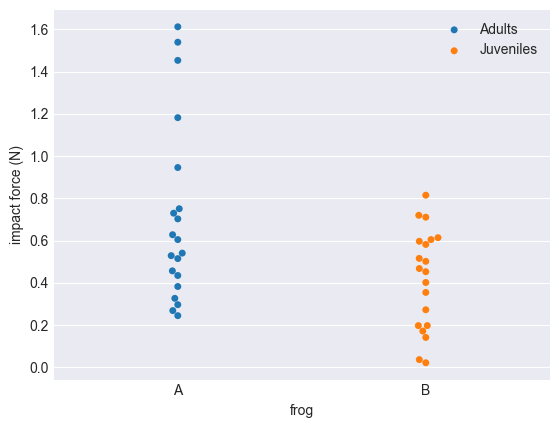

In [37]:
# Make bee swarm plot
_ = sns.swarmplot(data=df, x='ID', y='impact_force', hue='ID')

# axis labels and legend
_ = plt.xlabel('frog')
_ = plt.ylabel('impact force (N)')
_ = plt.legend(labels=['Adults', 'Juveniles'])

# Show the plot
plt.show()

In [38]:
force_a = df.loc[df["ID"] == 'A', ["impact_force"]].values
force_b = df.loc[df["ID"] == 'B', ["impact_force"]].values
print(f"Adult from average strike force: {round(np.mean(force_a), 2)} N")
print(f"Juvenile from average strike force: {round(np.mean(force_b), 2)} N")

Adult from average strike force: 0.71 N
Juvenile from average strike force: 0.42 N


The plot above does not look like they come from the same distribution. Frog A, the adult, has three or four very hard strikes, and Frog B, the juvenile, has a couple weak ones. However, it is possible that with only 20 samples it might be too difficult to tell if they have difference distributions, so we should proceed with the hypothesis test.

## Permutation test on frog data

The average strike force of Frog A was 0.71 Newtons (N), and that of Frog B was 0.42 N for a difference of 0.29 N. It is possible the frogs strike with the same force and this observed difference was by chance. We will compute the probability of getting at least a 0.29 N difference in mean strike force under the hypothesis that the distributions of strike forces for the two frogs are identical. We use a permutation test with a test statistic of the difference of means to test this hypothesis.

We'll use the data stored in the arrays `force_a` and `force_b` created in the previous cell for this test.

In [39]:
np.random.seed(712)

def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(force_a, force_b)

# Draw 10,000 permutation replicates of mean differences: perm_replicates
perm_reps_mean_diffs = draw_perm_reps(force_a, force_b,
                                      diff_of_means, size=10000)

# Compute p-value: p
p = np.sum(perm_reps_mean_diffs >= empirical_diff_means) / len(perm_reps_mean_diffs)

# Print the result
print('p-value =', p)

p-value = 0.0042


The p-value tells us that there is about a 0.4% chance that you would get the difference of means observed in the experiment if frogs were exactly the same. A p-value below 0.01 is typically said to be "statistically significant," but warning! We have computed a p-value; it is a number. We should not try to distill this into a yes-or-no phrase. p = 0.004 and p = 0.000000004 are both said to be "statistically significant," but they are definitely not the same!

## A one-sample bootstrap hypothesis test

Another juvenile frog was studied, Frog C (denoted as `III` in the **ID** column of the data), and say that we want to see if Frog B (first juvenile we tested earlier) and Frog C have similar impact forces. Let's pretend that we do not have Frog C's impact forces available, but we know they have a mean of 0.55 N. Because we don't have the original data, we cannot do a permutation test, and cannot assess the hypothesis that the forces from Frog B and Frog C come from the same distribution. Therefore, we'll test another, less restrictive hypothesis: ***The mean strike force of Frog B is equal to that of Frog C.***

To set up the bootstrap hypothesis test, we will take the mean as our test statistic. Remember, our goal is to calculate the probability of getting a mean impact force less than or equal to what was observed for Frog B if the (null) hypothesis that the true mean of Frog B's impact forces is equal to that of Frog C is true. We'll first translate all of the data of Frog B such that the mean is 0.55 N. This involves adding the mean force of Frog C and subtracting the mean force of Frog B from each measurement of Frog B. This leaves other properties of Frog B's distribution, such as the variance, unchanged.

In [40]:
# Make an array of translated impact forces: translated_force_b
translated_force_b = force_b.flatten() + 0.55 - np.mean(force_b)

# Take bootstrap replicates of Frog B's translated impact forces: bs_replicates
bs_replicates = draw_bs_reps(translated_force_b, np.mean, 10000)

# Compute fraction of replicates that are less than the observed Frog B force: p
p = np.sum(bs_replicates <= np.mean(force_b)) / 10000

# Print the p-value
print('p = ', p)

p =  0.0055


The low p-value suggests that the null hypothesis that Frog B and Frog C have the same mean impact force is **false**.

## A two-sample bootstrap hypothesis test for difference of means

We now want to test the hypothesis that Frog A and Frog B have the same mean impact force, but not necessarily the same distribution, which is also impossible with a permutation test.

To do the two-sample bootstrap test, we shift both arrays to have the same mean, since we are simulating the hypothesis that their means are, in fact, equal. We then draw bootstrap samples out of the shifted arrays and compute the difference in means. This constitutes a bootstrap replicate, and we generate many of them. The p-value is the fraction of replicates with a difference in means greater than or equal to what was observed.

In [41]:
forces_concat = np.concat((force_a.flatten(), force_b.flatten()))
empirical_diff_means = np.mean(force_a.flatten() - force_b.flatten())
print(empirical_diff_means)
forces_concat

0.28824999999999995


array([1.612, 0.605, 0.327, 0.946, 0.541, 1.539, 0.529, 0.628, 1.453,
       0.297, 0.703, 0.269, 0.751, 0.245, 1.182, 0.515, 0.435, 0.383,
       0.457, 0.73 , 0.172, 0.142, 0.037, 0.453, 0.355, 0.022, 0.502,
       0.273, 0.72 , 0.582, 0.198, 0.198, 0.597, 0.516, 0.815, 0.402,
       0.605, 0.711, 0.614, 0.468])

In [42]:
# Compute mean of all forces: mean_force
mean_force = np.mean(forces_concat)

# Generate shifted arrays
force_a_shifted = force_a.flatten() - np.mean(force_a) + mean_force
force_b_shifted = force_b.flatten() - np.mean(force_b) + mean_force

# Compute 10,000 bootstrap replicates from shifted arrays
bs_replicates_a = draw_bs_reps(force_a_shifted, np.mean, 10000)
bs_replicates_b = draw_bs_reps(force_b_shifted, np.mean, 10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_replicates_a - bs_replicates_b

# Compute and print p-value: p
p = np.sum(bs_replicates >= empirical_diff_means) / 10000
print('p-value =', p)

p-value = 0.005


We got a similar result as when you did the permutation test. Nonetheless, it is important to carefully think about what question we want to ask. Are we only interested in the mean impact force, or in the distribution of impact forces?

## A/B Testing

### The vote for the Civil Rights Act in 1964

The Civil Rights Act of 1964 was one of the most important pieces of legislation ever passed in the USA. Excluding "present" and "abstain" votes, 153 House Democrats and 136 Republicans voted yea. However, 91 Democrats and 35 Republicans voted nay. Did party affiliation make a difference in the vote?

To answer this question, we will evaluate **the (null) hypothesis that the party of a House member has no bearing on his or her vote**. We will use the fraction of Democrats voting in favor as our test statistic and evaluate the probability of observing a fraction of Democrats voting in favor at least as small as the observed fraction of 153/244. (That's right, at least as small as. In 1964, it was the Democrats who were less progressive on civil rights issues.) To do this, we'll permute the party labels of the House voters and then arbitrarily divide them into "Democrats" and "Republicans" and compute the fraction of Democrats voting yea.

In [43]:
# Construct arrays of data: dems, reps
dems = np.array([True] * 153 + [False] * 91)
reps = np.array([True] * 136 + [False] * 35)

def frac_yea_dems(dems, reps):
    """Compute fraction of Democrat yea votes."""
    frac = np.sum(dems) / len(dems)
    return frac

# Acquire permutation samples: perm_replicates
perm_replicates = draw_perm_reps(dems, reps, frac_yea_dems, 10000)

# Compute and print p-value: p
p = np.sum(perm_replicates <= 153/244) / len(perm_replicates)
print('p-value =', p)

p-value = 0.0002


This small p-value suggests that **party identity had a lot to do with the voting**. Importantly, the South had a higher fraction of Democrat representatives, and consequently also a more racist bias.

## A time-on-website analog

It turns out that we already did a hypothesis test analogous to an A/B test where we were interested in how much time is spent on the website before and after an ad campaign. The frog tongue force (a continuous quantity like time on the website) is an analog. "Before" = Frog A and "after" = Frog B. Let's practice this again with something that actually is a before/after scenario.

Let's return to the no-hitter data set. In 1920, Major League Baseball implemented important rule changes that ended the so-called dead ball era. Importantly, the pitcher was no longer allowed to spit on or scuff the ball, an activity that greatly favors pitchers. In this problem we will perform an A/B test to determine if these rule changes resulted in a slower rate of no-hitters (i.e., longer average time between no-hitters) using the difference in mean inter-no-hitter time as our test statistic. The inter-no-hitter times for the respective eras are stored in the arrays `nht_dead` and `nht_live`, where "nht" is meant to stand for "no-hitter time."

Since we will be using our `draw_perm_reps()` function, it may be useful to remind ourself of its call signature: `draw_perm_reps(d1, d2, func, size=1)` or check back to cell 35 where it is defined.

In [44]:
# read data extracted from datacamp exercise
nht_dead = np.loadtxt('./data/nht_dead.txt', dtype=int)
nht_live = np.loadtxt('./data/nht_live.txt', dtype=int)

In [45]:
np.random.seed(713)
# Compute the observed difference in mean inter-no-hitter times: nht_diff_obs
nht_diff_obs = diff_of_means(nht_dead, nht_live)

# Acquire 10,000 permutation replicates of difference in mean no-hitter time: perm_replicates
perm_replicates = draw_perm_reps(nht_dead, nht_live, diff_of_means, 10000)

# Compute and print the p-value: p
p = np.sum(perm_replicates <= nht_diff_obs) / len(perm_replicates)
print('p-val =', p)

p-val = 0.0001


Our p-value is 0.0001, which means that only one out of your 10,000 replicates had a result as extreme as the actual difference between the dead ball and live ball eras. This suggests strong statistical significance. We need to be careful here because we could very well have gotten zero replicates that were as extreme as the observed value. This just means that the p-value is quite small, almost certainly smaller than 0.001.